In [142]:
%pip install easyocr
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
from matplotlib import pyplot as plt
import easyocr
import re

In [3]:
harcascade = "model/haarcascade_russian_plate_number.xml"
plate_cascade = cv2.CascadeClassifier(harcascade)

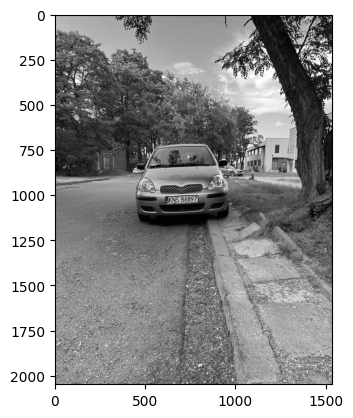

In [19]:
img = cv2.imread('test_images/image15.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

In [20]:
plates = plate_cascade.detectMultiScale(img_gray, 1.1, 4)
plates

array([[610, 988, 213,  71]])

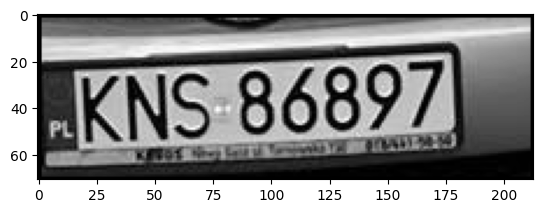

In [21]:
img_rois = []
for (x,y,w,h) in plates:
    cv2.rectangle(img_gray, (x,y), (x+w, y+h), (0,255,0), 2)
    cv2.putText(img_gray, "Number Plate", (x,y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 0, 255), 2)

    img_roi = img_gray[y: y+h, x:x+w]
    img_rois.append(img_roi)
    plt.imshow(img_roi, cmap='gray')
    

In [22]:
reader = easyocr.Reader(['pl'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [23]:
final_output = []
for img_roi in img_rois:
  output = reader.readtext(img_roi)
  final_output.append(output)
final_output

[[([[10, 12], [181, 12], [181, 62], [10, 62]],
   'KNS 86897',
   0.8496276588639443)]]

In [24]:
flattened_list = [item[1] for sublist in final_output for item in sublist]
flattened_list

['KNS 86897']

In [25]:
plate_number = ''
license_plate_pattern = re.compile(r'^(?:[A-Z]{2}\d{4,5}[A-Z]{0,1}|[A-Z]{3}\d{4}[A-Z]{2}|[A-Z]{1}[A-Z0-9]{1,2}\d{4,5}|[A-Z]{2}[A-Z0-9]{1,3}\d{2,4}|[A-Z]{2}\s\d{4,5}[A-Z]{0,1}|[A-Z]{3}\s\d{4}[A-Z]{2}|[A-Z]{1}\s[A-Z0-9]{1,2}\s\d{4,5}|[A-Z]{2}\s[A-Z0-9]{1,3}\s\d{2,4})$')
for txt in flattened_list:
  print(txt)
  if license_plate_pattern.match(txt):
    plate_number = txt
    break
plate_number


KNS 86897


''